## Define a nutrient profile that can be systematically manipulated 

I want to build a profile that can be used to explore parameter space for the non-dimensional number $\tau_v=-Z\delta_v^2C/\delta_vC$. Arctan could be a good candidate.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import sympy as sym
sym.init_printing() # enable fancy printing

In [2]:
# Set appearance options seaborn

sns.set_style('white')
sns.set_context('notebook')

In [3]:
# Constants and scales from canyon bathy

#L = 6400.0 # canyon length
#R = 5000.0 # Upstream radius of curvature
#g = 9.81 # accel. gravity
#Wsb = 13000 # Width at shelf break
#Hs = 147.5 # Shelf break depth
#Hh = 97.5 # 
#Hr = 130.0 # rim depth at dn station
# NOTE: The default values of all functions correspond to the base case


In [7]:
a,b,c,z,Csb,Hs = sym.symbols('a,b,c,z,Csb,Hs')
func = -1.5*sym.atan(a*(z+Hs)) + Csb
ndfunc = func/Csb

In [6]:
func

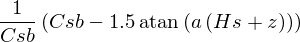

In [8]:
ndfunc

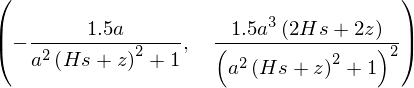

In [17]:
func.diff(z), (func.diff(z)).diff(z)

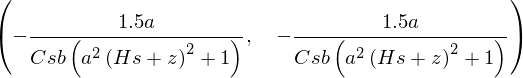

In [18]:
ndfunc.diff(z), (ndfunc.diff(z))

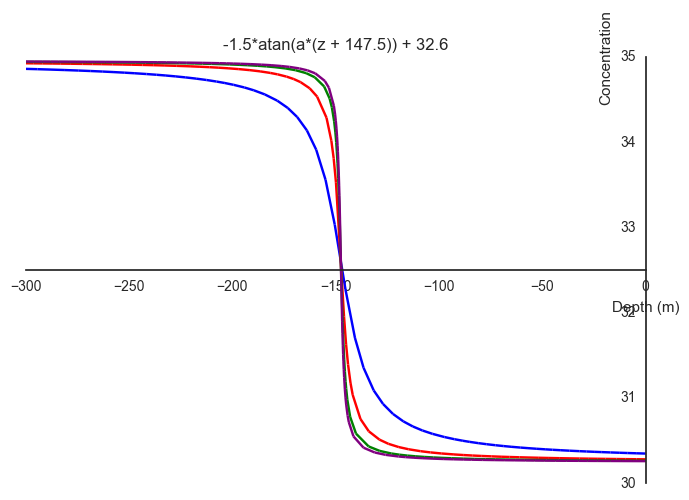

In [46]:
func = func.subs({Hs:147.5,Csb:32.6})
hand =sym.plot(func.subs(a,0.1),
               func.subs(a,0.3),
               func.subs(a,0.6),
               func.subs(a,0.8),(z, -300, 0),
               xlabel='Depth (m)',
               ylabel='Concentration',
               title='%s' %func,
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

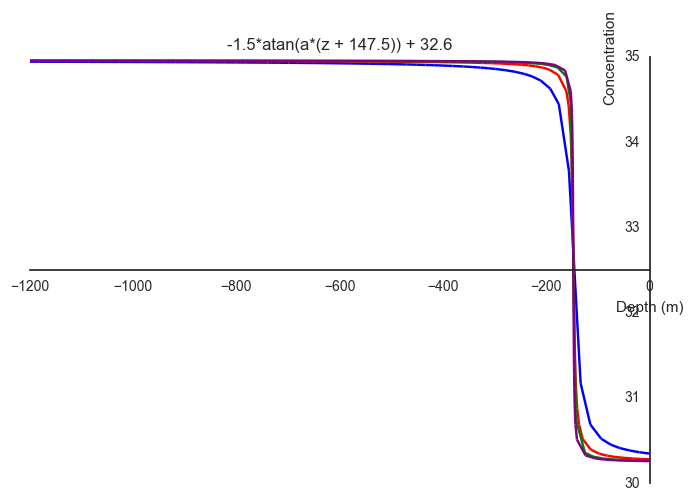

In [47]:
func = func.subs({Hs:147.5,Csb:32.6})
hand =sym.plot(func.subs(a,0.1),
               func.subs(a,0.3),
               func.subs(a,0.6),
               func.subs(a,0.8),(z, -1200, 0),
               xlabel='Depth (m)',
               ylabel='Concentration',
               title='%s' %func,
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

### Non-dim by C(Hs) = 32.6 $\mu$M

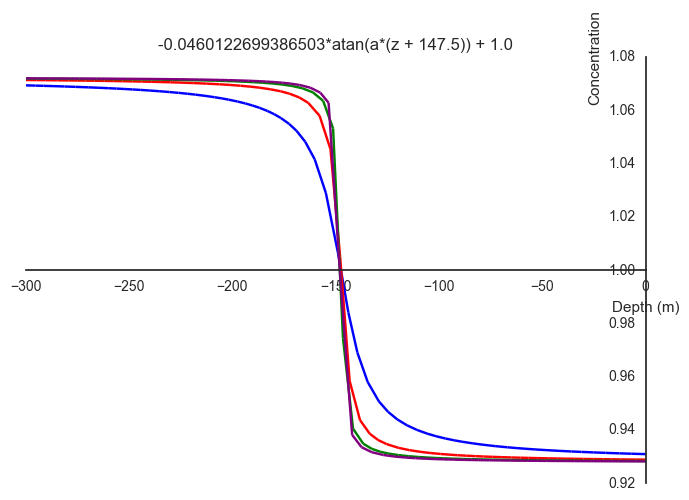

In [48]:
ndfunc = ndfunc.subs({Hs:147.5,Csb:32.6})
hand =sym.plot(ndfunc.subs(a,0.1),
               ndfunc.subs(a,0.3),
               ndfunc.subs(a,0.6),
               ndfunc.subs(a,0.8),(z, -300, 0),
               xlabel='Depth (m)',
               ylabel='Concentration',
               title='%s' %ndfunc,
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

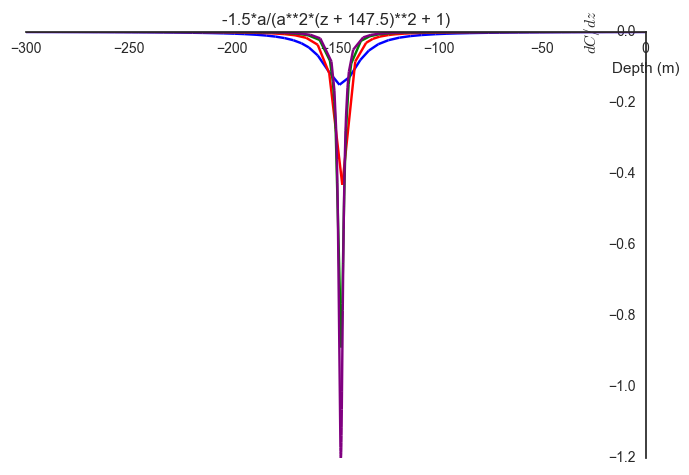

In [52]:
hand =sym.plot((func.subs(a,0.1)).diff(z),
               (func.subs(a,0.3)).diff(z),
               (func.subs(a,0.6)).diff(z),
               (func.subs(a,0.8)).diff(z),(z, -300, 0),
               xlabel='Depth (m)',
               ylabel='$dC/dz$',
               title='%s' %func.diff(z),
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

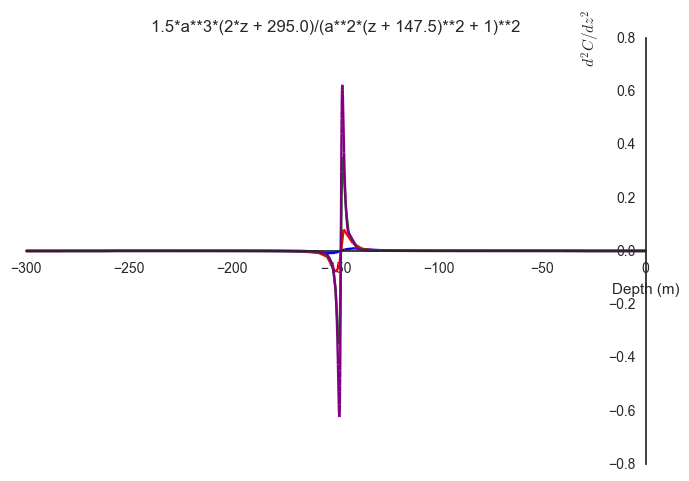

In [54]:
hand =sym.plot(((func.subs(a,0.1)).diff(z)).diff(z),
               ((func.subs(a,0.3)).diff(z)).diff(z),
               ((func.subs(a,0.6)).diff(z)).diff(z),
               ((func.subs(a,0.8)).diff(z)).diff(z),(z, -300, 0),
               xlabel='Depth (m)',
               ylabel='$d^2C/dz^2$',
               title='%s' %((func).diff(z)).diff(z),
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

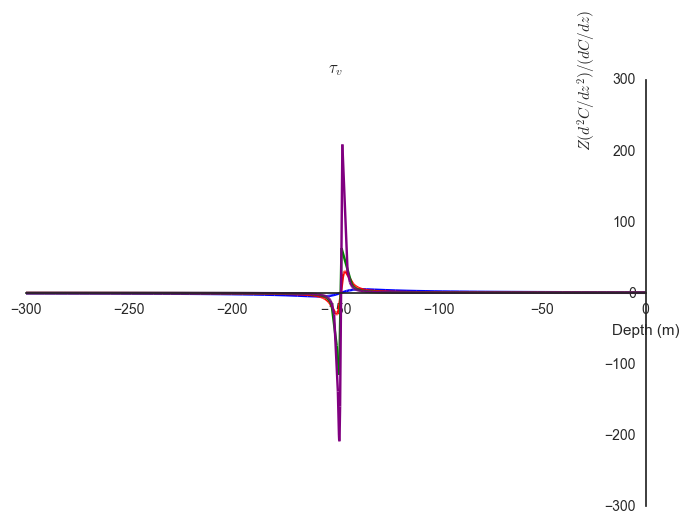

In [64]:
Z = 50 # m approx value of upwelling depth
hand = sym.plot((-Z*(func.subs(a,0.1).diff(z)).diff(z))/func.subs(a,0.1).diff(z),
                (-Z*(func.subs(a,0.3).diff(z)).diff(z))/func.subs(a,0.1).diff(z),
                (-Z*(func.subs(a,0.6).diff(z)).diff(z))/func.subs(a,0.1).diff(z),
                (-Z*(func.subs(a,0.8).diff(z)).diff(z))/func.subs(a,0.1).diff(z),
                (z, -300, 0), 
                xlabel='Depth (m)',
                ylabel='$Z(d^2C/dz^2)/(dC/dz)$',
                title=r'$\tau_v$',
                show = False)

hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

* I don't know if I like that the second derivative is zero at the shelf break because the second derivative and thus, $\tau_v$ are always zero.

* It is fairly easy to change dC/dz at the shelf break by changing the factor multiplying (z+Hs), for example from 0.3 to 0.8, the value of the first derivative goes from -0.045 to -0.09 at the shelf break (max). The function also gets smoother over a larger depth and that can be a problem.